In [5]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns
from datetime import datetime
import cPickle
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)
#os.chdir('/Users/Jonathan/citiBike_NYC')
sns.set_context("poster")
sns.set(rc={"figure.figsize": (6, 6)})
import warnings; warnings.filterwarnings('ignore')

#### Download all of the data for 2014 & 2015

In [2]:
# # Read data from citibikenyc website (https://www.citibikenyc.com/system-data)
# from zipfile import ZipFile
# from StringIO import StringIO
# import urllib2

# months = [("%02d" % i) for i in range(1,13)]
# dfs = []
# for i in months:
#     url = "https://s3.amazonaws.com/tripdata/2014" +i + "-citibike-tripdata.zip"
#     print url    
#     r = urllib2.urlopen(url).read()
#     file = ZipFile(StringIO(r))
#     monthlyTripData = file.open("".join(["2015",i,"-citibike-tripdata.csv"]))
#     dfs.append(pd.read_csv(monthlyTripData))
    
# months = [("%02d" % i) for i in range(1,12)]
# dfs = []
# for i in months:
#     url = "https://s3.amazonaws.com/tripdata/2015" +i + "-citibike-tripdata.zip"
#     print url    
#     r = urllib2.urlopen(url).read()
#     file = ZipFile(StringIO(r))
#     monthlyTripData = file.open("".join(["2015",i,"-citibike-tripdata.csv"]))
#     dfs.append(pd.read_csv(monthlyTripData))

##### Read in the data

In [ ]:
# Read data for all of 2014
months = [("%02d" % i) for i in range(1,13)]
dfs2014 = []
for i in months[:8]:
    file = "2014-" +i +" - Citi Bike trip data.csv"
    print file    
    monthlyTripData = pd.read_csv("".join(['data/',file]))
    dfs2014.append(monthlyTripData)
for i in months[8:13]:
    file = "2014" +i +"-citibike-tripdata.csv"
    print file    
    monthlyTripData = pd.read_csv("".join(['data/',file]))
    dfs2014.append(monthlyTripData)

In [6]:
# Read data for all of 2015
months = [("%02d" % i) for i in range(1,13)]
dfs2015 = []
for i in months:
    file = "2015" +i +"-citibike-tripdata.csv"
    print file    
    monthlyTripData = pd.read_csv("".join(['data/',file]))
    dfs2015.append(monthlyTripData)

201501-citibike-tripdata.csv
201502-citibike-tripdata.csv
201503-citibike-tripdata.csv
201504-citibike-tripdata.csv
201505-citibike-tripdata.csv
201506-citibike-tripdata.csv
201507-citibike-tripdata.csv
201508-citibike-tripdata.csv
201509-citibike-tripdata.csv
201510-citibike-tripdata.csv
201511-citibike-tripdata.csv
201512-citibike-tripdata.csv


In [8]:
dfs2015[0].head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1346,1/1/2015 0:01,1/1/2015 0:24,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,Subscriber,1960,2
1,363,1/1/2015 0:02,1/1/2015 0:08,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,Subscriber,1963,1
2,346,1/1/2015 0:04,1/1/2015 0:10,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,Subscriber,1974,1
3,182,1/1/2015 0:04,1/1/2015 0:07,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,Subscriber,1969,1
4,969,1/1/2015 0:05,1/1/2015 0:21,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,Subscriber,1977,1


In [ ]:
dfs2015[0].head()

In [ ]:
dfs2015[0].groupby('start station id')['starttime']

#### split datetime into month, year, hour, day, day_of_week

In [ ]:
import pandas as pd
import numpy as np
import re
import os
import datetime

def splitDate(col, df):
    days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    month = []
    day = []
    year = []
    hour = []
    minute = []
    day_of_week = []
    
    d = []
    for r in df[col]:
        dateTime = r.split(' ')
        try:
            date = datetime.datetime.strptime(str(dateTime[0]), '%Y-%m-%d')
        except:
            date = datetime.datetime.strptime(str(dateTime[0]), '%m/%d/%Y')
        try:
            time = datetime.datetime.strptime(str(dateTime[1]), '%H:%M:%S')
        except:
            time = datetime.datetime.strptime(str(dateTime[1]), '%H:%M') 

        month.append(date.month)
        year.append(date.year)
        hour.append(time.hour)
        minute.append(time.minute)
        
        if (date.day not in d):
            d.append(date.day)
            print len(d),
        day.append(date.day)
        day_of_week.append(days[date.weekday()]) 
    return month, year, hour, minute, day, day_of_week

def add_columns(df):
    month, year, hour, minute, day, day_of_week = splitDate('starttime', df)
    df['start_year'] = year
    df['start_month'] = month
    df['start_hour'] = hour
    df['start_minute'] = minute
    df['start_day'] = day
    df['start_day_of_week'] = day_of_week
    
    month, year, hour, minute, day, day_of_week = splitDate('stoptime', df)
    df['end_year'] = year
    df['end_month'] = month
    df['end_hour'] = hour
    df['end_minute'] = minute
    df['end_day'] = day
    df['end_day_of_week'] = day_of_week
    
    df = df.drop(['starttime','stoptime'], axis=1)
    return df

In [2]:
# Load all 2015
import cPickle
with open('dfs2015.cPickle','r') as f:
    dfs2015 = cPickle.load(f)

In [3]:
# Concatenate all dfs
df = pd.DataFrame()
for i in range(12):
    df = pd.concat([df,dfs2015[i]])

In [4]:
df.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,...,start_hour,start_minute,start_day,start_day_of_week,end_year,end_month,end_hour,end_minute,end_day,end_day_of_week
0,1346,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,...,0,1,1,Thursday,2015,1,0,24,1,Thursday
1,363,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,...,0,2,1,Thursday,2015,1,0,8,1,Thursday
2,346,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,...,0,4,1,Thursday,2015,1,0,10,1,Thursday
3,182,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,...,0,4,1,Thursday,2015,1,0,7,1,Thursday
4,969,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,...,0,5,1,Thursday,2015,1,0,21,1,Thursday


In [6]:
# del df['tripduration']
# del df['bikeid']
# del df['end station latitude']
# del df['end station longitude']
# del df['end station name']
# del df['start station name']
# del df['usertype']
# del df['birth year']
# del df['gender']

In [7]:
df.columns

Index([u'tripduration', u'start station id', u'start station name',
       u'start station latitude', u'start station longitude',
       u'end station id', u'end station name', u'end station latitude',
       u'end station longitude', u'bikeid', u'usertype', u'birth year',
       u'gender', u'start_year', u'start_month', u'start_hour',
       u'start_minute', u'start_day', u'start_day_of_week', u'end_year',
       u'end_month', u'end_hour', u'end_minute', u'end_day',
       u'end_day_of_week'],
      dtype='object')

In [8]:
p = pd.unique(df['end station id'])
len(p)

498

In [9]:
p
STATIONS = [s for s in p if ((s >= 300 and s < 350))] #& (s not in map(int,captured_stations)))]
print STATIONS

[312, 313, 327, 321, 325, 348, 341, 305, 308, 317, 346, 345, 328, 344, 336, 324, 334, 331, 311, 326, 301, 302, 335, 347, 316, 329, 342, 307, 318, 323, 340, 349, 314, 339, 300, 303, 309, 315, 320, 310, 332, 306, 304, 337, 330, 322, 343, 319]


### ---> Over 10 million rides

In [11]:
# sample
# dfs = df
# df = dfs.sample(frac = 0.1)
# Save sample
# with open('df_sample.cPickle', 'w') as f:
#     cPickle.dump(df, f)

In [12]:
df.shape

(9937969, 25)

In [13]:
df.columns

Index([u'tripduration', u'start station id', u'start station name',
       u'start station latitude', u'start station longitude',
       u'end station id', u'end station name', u'end station latitude',
       u'end station longitude', u'bikeid', u'usertype', u'birth year',
       u'gender', u'start_year', u'start_month', u'start_hour',
       u'start_minute', u'start_day', u'start_day_of_week', u'end_year',
       u'end_month', u'end_hour', u'end_minute', u'end_day',
       u'end_day_of_week'],
      dtype='object')

In [15]:
df.shape

(9937969, 25)

##### all trips

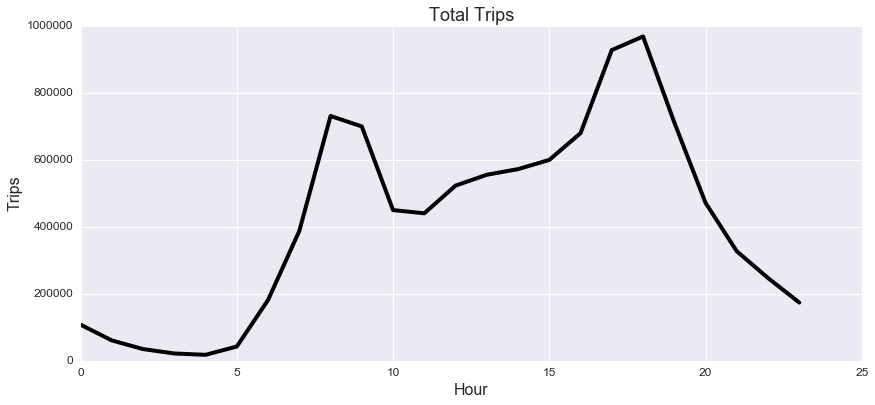

In [35]:
# To plot this load all of the data from 2015
sns.set_context("paper")
sns.set(rc={"figure.figsize": (14, 6)})
plt.plot(df.groupby('end_hour')['start station name'].count(),linewidth=4,color="black")
plt.ylabel('Trips',fontsize=16)
plt.xlabel('Hour',fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title("Total Trips",fontsize=18)

##### Trips by weekday / weekend

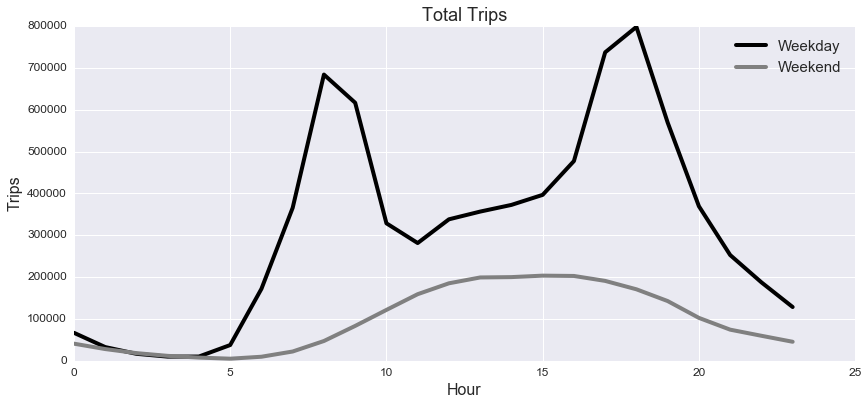

In [36]:
# To plot this load all of the data from 2015
sns.set(rc={"figure.figsize": (14, 6)})
plt.plot(df[~df.end_day_of_week.isin(['Saturday','Sunday'])]\
         .groupby('end_hour')['start station name'].count(),label = 'Weekday',linewidth=4,color="black")
plt.plot(df[df.end_day_of_week.isin(['Saturday','Sunday'])]\
         .groupby('end_hour')['start station name'].count(),label = 'Weekend',linewidth=4,color="grey")
plt.ylabel('Trips',fontsize=16)
plt.xlabel('Hour',fontsize=16)
plt.legend()
plt.legend(ncol=1, loc="upper right",prop={'size':15})
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title("Total Trips",fontsize=18)

##### July / December by weekday / weekend

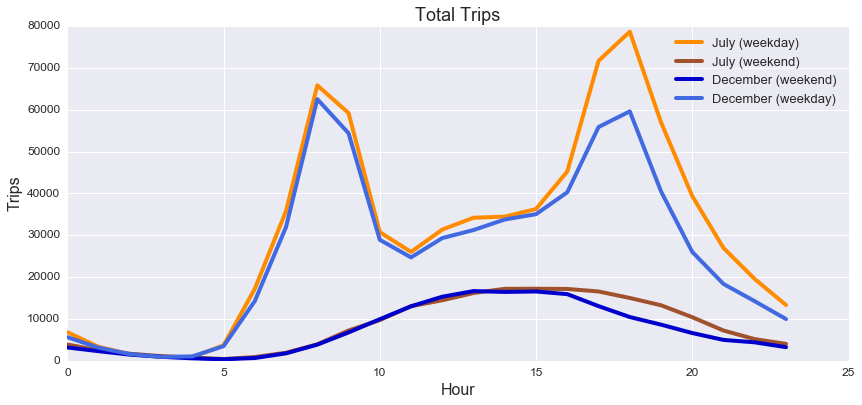

In [37]:
# To plot this load all of the data from 2015
sns.set(rc={"figure.figsize": (14, 6)})
df_july = df[df.end_month == 6]
df_december = df[df.end_month == 12]
plt.plot(df_july[~df_july.end_day_of_week.isin(['Saturday','Sunday'])]\
         .groupby('end_hour')['start station name'].count(),label = 'July (weekday)',linewidth=4,color="darkorange")
plt.plot(df_july[df_july.end_day_of_week.isin(['Saturday','Sunday'])]\
         .groupby('end_hour')['start station name'].count(),label = 'July (weekend)',linewidth=4,color="sienna")
plt.plot(df_december[df_december.end_day_of_week.isin(['Saturday','Sunday'])]\
         .groupby('end_hour')['start station name'].count(),label = 'December (weekend)',linewidth=4,color="mediumblue")
plt.plot(df_december[~df_december.end_day_of_week.isin(['Saturday','Sunday'])]\
         .groupby('end_hour')['start station name'].count(),label = 'December (weekday)',linewidth=4,color="royalblue")
plt.ylabel('Trips',fontsize=16)
plt.xlabel('Hour',fontsize=16)
plt.legend()
plt.legend(ncol=1, loc="upper right",prop={'size':13})
plt.tick_params(axis='both', which='major', labelsize=12)
plt.title("Total Trips",fontsize=18)

In [40]:
df.head()

,tripduration,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,...,start_hour,start_minute,start_day,start_day_of_week,end_year,end_month,end_hour,end_minute,end_day,end_day_of_week
0,1346,455,1 Ave & E 44 St,40.750020,-73.969053,265,Stanton St & Chrystie St,40.722293,-73.991475,18660,...,0,1,1,Thursday,2015,1,0,24,1,Thursday
1,363,434,9 Ave & W 18 St,40.743174,-74.003664,482,W 15 St & 7 Ave,40.739355,-73.999318,16085,...,0,2,1,Thursday,2015,1,0,8,1,Thursday
2,346,491,E 24 St & Park Ave S,40.740964,-73.986022,505,6 Ave & W 33 St,40.749013,-73.988484,20845,...,0,4,1,Thursday,2015,1,0,10,1,Thursday
3,182,384,Fulton St & Waverly Ave,40.683178,-73.965964,399,Lafayette Ave & St James Pl,40.688515,-73.964763,19610,...,0,4,1,Thursday,2015,1,0,7,1,Thursday
4,969,474,5 Ave & E 29 St,40.745168,-73.986831,432,E 7 St & Avenue A,40.726218,-73.983799,20197,...,0,5,1,Thursday,2015,1,0,21,1,Thursday


In [126]:
temp = df.groupby('end station id')['bikeid'].count()

In [127]:
most_trips = temp.sort_values(ascending = False)

In [128]:
stations_geo = df.groupby('end station id')[['end station id','start station latitude','start station longitude']].head(1)

In [129]:
stations_geo.head()

,end station id,start station latitude,start station longitude
0,265,40.750020,-73.969053
1,482,40.743174,-74.003664
2,505,40.740964,-73.986022
3,399,40.683178,-73.965964
4,432,40.745168,-73.986831


In [130]:
most_trips.head()

end station id
293    96341
519    95783
497    90303
435    87867
521    83286
Name: bikeid, dtype: int64

In [131]:
df_most_trips = stations_geo.join(most_trips,on='end station id')
df_most_trips.columns = ['end station id','start station latitude','start station longitude','count']

In [132]:
filename_mosttrips = 'most_trips.csv'
df_most_trips.to_csv(filename_mosttrips)

In [133]:
df_most_trips

,end station id,start station latitude,start station longitude,count
0,265,40.750020,-73.969053,29847
1,482,40.743174,-74.003664,41697
2,505,40.740964,-73.986022,47300
3,399,40.683178,-73.965964,4348
4,432,40.745168,-73.986831,50194
5,383,40.750073,-73.998393,34633
6,474,40.748549,-73.988084,40862
7,174,40.739323,-74.008119,29114
8,488,40.762272,-73.987882,44750
10,151,40.713126,-73.984844,69721


In [10]:
from bokeh.charts import Area, show, vplot, output_file, defaults

defaults.width = 400
defaults.height = 400

# create some example data
data = dict(
    python=[2, 3, 7, 5, 26, 221, 44, 233, 254, 265, 266, 267, 120, 111],
    pypy=[12, 33, 47, 15, 126, 121, 144, 233, 254, 225, 226, 267, 110, 130],
    jython=[22, 43, 10, 25, 26, 101, 114, 203, 194, 215, 201, 227, 139, 160],
)

area1 = Area(data, title="Area Chart", legend="top_left",
             xlabel='time', ylabel='memory')

area2 = Area(data, title="Stacked Area Chart", legend="top_left",
             stack=True, xlabel='time', ylabel='memory')

output_file("area.html", title="example")

show(vplot(area1, area2))